<a href="https://colab.research.google.com/github/alixtrn/BASC0080/blob/main/google_colab_basc0080_w3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rule = {"111": '0', "110": '0', "101": '0', "000": '0',
        "100": '1', "011": '1', "010": '1', "001": '1'}

In [ ]:
def window(iterable, stride=3):
  for index in range(len(iterable) - stride + 1):
    yield iterable[index:index + stride]


In [ ]:
window('foobar')

In [ ]:
list(window('foobar'))

In [ ]:
initial_state = '00000000000000000000100000000000000000000'

In [ ]:
list(window(initial_state))

In [ ]:
patterns = window(initial_state)

In [ ]:
new_state = ''.join(rule[pat] for pat in patterns)

In [ ]:
new_state

In [ ]:
state = initial_state
for _ in range(15):
  patterns = window(state)
  state = ''.join(rule[pat] for pat in patterns)
  print(state)


In [ ]:
def generate_pattern(state, rule):
  for time in range(MAX_TIME):
    print(state)
    patterns = window(state)
    state = ''.join(rule[pat] for pat in patterns)
    state = '0{}0'.format(state)
  print(state)


In [ ]:
MAX_TIME = 20
generate_pattern(initial_state,rule)

In [ ]:
rule = { 30: {"111": '0', "110": '0', "101": '0', "000": '0',
              "100": '1', "011": '1', "010": '1', "001": '1'},

         90: {"111": '0', "110": '1', "101": '0', "000": '0',
              "100": '1', "011": '1', "010": '0', "001": '1'},

         110: {"111": '0', "110": '1', "101": '1', "000": '0',
              "100": '0', "011": '1', "010": '0', "001": '0'},

         184: {"111": '1', "110": '0', "101": '1', "000": '0',
              "100": '1', "011": '1', "010": '0', "001": '0'},
        }

In [ ]:
generate_pattern(initial_state, rule[110])

In [ ]:
import sys
from random import choice
from time import sleep

RULES = { 30: {"111": '0', "110": '0', "101": '0', "000": '0',
              "100": '1', "011": '1', "010": '1', "001": '1'},

         90: {"111": '0', "110": '1', "101": '0', "000": '0',
              "100": '1', "011": '1', "010": '0', "001": '1'},

         110: {"111": '0', "110": '1', "101": '1', "000": '0',
              "100": '0', "011": '1', "010": '0', "001": '0'},

         184: {"111": '1', "110": '0', "101": '1', "000": '0',
              "100": '1', "011": '1', "010": '0', "001": '0'},
        }

MAX_TIME = 20

def window(iterable, stride=3):
  for index in range(len(iterable) - stride + 1):
    yield iterable[index:index + stride]

def generate_pattern(state, rule):
  for time in range(MAX_TIME):
    print(state)

    patterns = window(state)
    state = ''.join(rule[pat] for pat in patterns)
    state = '0{}0'.format(state)
    sleep(.1)

def print_row(row):
  for cell in row:
    if cell == '1':
      sys.stdout.write(u'\u2588')
    else:
        sys.stdout.write(' ')
  sys.stdout.write('\n')


In [ ]:
rule_input = 30
rule = RULES[rule_input]
print("Using rule", rule_input)

initial_state = '0' * MAX_TIME + '1' + '0' * MAX_TIME
print("initial state", initial_state)

generate_pattern(initial_state, rule)

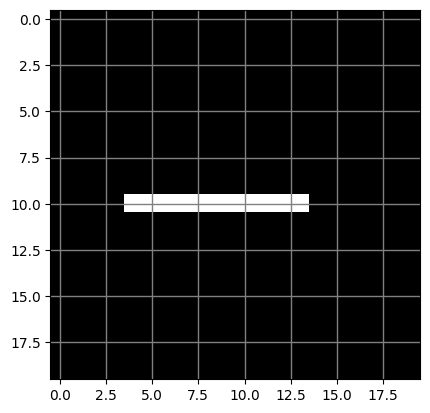

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

n = 20                    # size of matrix
mat = np.zeros((n,n))     # create an (n x n) matrix with zeors
mat[4:14, 9] = 1          # add 10 live cells
temp_mat = mat.copy()     # create a temporary matrix

# Plot initial image
plt.imshow(np.flipud(mat.T), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

In [ ]:
mat1 = np.roll(mat, 1, axis=0)
mat2 = np.roll(mat, -1, axis=0)
mat3 = np.roll(mat, 1, axis=1)
mat4 = np.roll(mat, -1, axis=1)
mat5 = np.roll(np.roll(mat, 1, axis=0), 1, axis=1)
mat6 = np.roll(np.roll(mat, 1, axis=0), -1, axis=1)
mat7 = np.roll(np.roll(mat, -1, axis=0), 1, axis=1)
mat8 = np.roll(np.roll(mat, -1, axis=0), -1, axis=1)

# Plot test image
plt.imshow(np.flipud(mat5.T), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

n = 20                    # size of matrix
mat = np.zeros((n,n))     # create an (n x n) matrix with zeors
mat[4:14, 9] = 1          # add 10 live cells
temp_mat = mat.copy()     # create a temporary matrix

# Plot initial image
plt.imshow(np.flipud(mat.T), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

for k in range(200):
  # count the number of alive neighbours
  numb_alive = mat1 + mat2 + mat3 + mat4 + mat5 + mat6 + mat7 + mat8

  # update the temporary matrix based on the rules of the game
  temp_mat[(mat == 1) & (numb_alive < 2)] = 0
  temp_mat[(mat == 1) & (numb_alive > 3)] = 0
  temp_mat[(mat == 1) & ((numb_alive == 2) | (numb_alive == 3))] = 1
  temp_mat[(mat == 0) & (numb_alive == 3)] = 1

  # update the matrix
  mat = temp_mat.copy()

  # update neighbour matrices
  mat1 = np.roll(mat, 1, axis=0)
  mat2 = np.roll(mat, -1, axis=0)
  mat3 = np.roll(mat, 1, axis=1)
  mat4 = np.roll(mat, -1, axis=1)
  mat5 = np.roll(np.roll(mat, 1, axis=0), 1, axis=1)
  mat6 = np.roll(np.roll(mat, 1, axis=0), -1, axis=1)
  mat7 = np.roll(np.roll(mat, -1, axis=0), 1, axis=1)
  mat8 = np.roll(np.roll(mat, -1, axis=0), -1, axis=1)

  # plot the update image
  plt.imshow(np.flipud(mat.T), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')
  plt.grid(color='grey', linestyle='-', linewidth=1)
  plt.show()

  # Pause to see changes on the screen
  time.sleep(0.5)

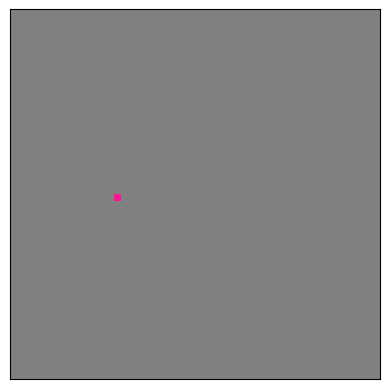

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time

# choose the random seed (to make sure we get same result)
np.random.seed(42)

q = 0.5                 # probability for recovery
n = 50                  # size of matrix (50 x 50)
mat = np.zeros((n, n))  # create matrix (nxn) and fill up with 0

# place one infected individual at position (25, 15) in the matrix
mat[24, 14] = 1

colormap = ListedColormap(["grey", "deeppink", "seagreen"])
plt.imshow(mat, cmap=colormap, origin="lower", vmin=0, vmax=2)
plt.xticks([])
plt.yticks([])
plt.grid(color="grey", linestyle='-',linewidth=1)
plt.show()

In [ ]:
temp = np.copy(mat)
t = 80 # number of time steps (corresponding to number of weeks)
n_healthy = np.zeros(t) # vector to count healthy at each time step
n_infected = np.zeros(t) # vector to count infected at each time step
n_resistant = np.zeros(t) # vector to count resistant at each time step

for k in range(t):
  k_h = 0 #initialize counter for healthy
  k_i = 0 #initialize counter for infected
  k_r = 0 #initialize counter for resistant
  for i in range(n):
    for j in range(n):
      if mat[i,j] == 0:
        k_h += 1 # count healthy
      elif mat[i,j] == 1:
        k_i += 1 # count infected
      elif mat[i,j] ==2:
        k_r += 1 # count resistant

      R = 0 # initialize counter for number of infected neighbours

      if mat[i,j] == 0: # if healthy
        E, W, N, S = i+1, i-1, j-1, j+1
        # check if outside the matrix
        E = 0 if E == n else E
        W = n-1 if W == -1 else W
        N = n-1 if N == -1 else N
        S = 0 if S == n else S
        # count number of infected neighbours
        R += mat[E,j] + mat[W,j] + mat[i,N] + mat[i,S] + mat[E,N] + mat[E,S] + mat[W,N] + mat[W,S]

      a, b = -1.5, 0.6
      p_infect = 1 / (1+np.exp(-(a + b * R))) # probability for healthy to become infected
      g = np.random.rand()

      if g < p_infect and mat[i,j] == 0 and R > 0:
        temp[i,j] = 1 # healthly becomes infected

      if mat[i,j] == 1: # if infected
        g = np.random.rand()
        if g > q:
          temp[i,j] = 2 # infected becomes resistant

  plt.imshow(mat, cmap=colormap, origin="lower", vmin=0, vmax=2)
  plt.xticks([])
  plt.yticks([])
  plt.grid(color="grey", linestyle='-', linewidth=1)
  plt.show()
  time.sleep(0.5)  # To see movement on the screen, we need to pause the loop

  mat = np.copy(temp)  # Overwrite matrix
  # Save the number of healthy, infected, and resistant at each time step
  n_healthy[k] = k_h
  n_infected[k] = k_i
  n_resistant[k] = k_r

plt.plot(np.arange(1,t+1), n_healthy, label="Susceptible", color="black")
plt.plot(np.arange(1,t+1), n_infected, label="Infected", color="red")
plt.plot(np.arange(1,t+1), n_resistant, label="Recovered", color="green")
plt.xlabel("Time steps (weeks)")
plt.ylabel("Number")
plt.legend()
plt.show()

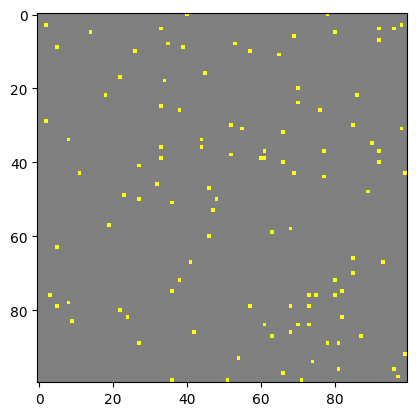

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time

phiv = 0.01  # Fraction of cells that are initially infected at time zero
Tao = 5  # Number of time-steps a dead cell stays infected
p_rep = 0.97  # Probability that a dead cell is replaced by a healthy cell
n = 100  # Size of matrix
NN = n * n  # Total number of cells in grid
Time_A1 = np.zeros((n, n), dtype=int)  # A matrix that is used to count life time of A1 cells
mat = np.zeros((n, n), dtype=int)  # Create matrix with zeros (Healthy CD4 T cells)

# %% Add about phiv% (1%) of infected cells at random places
for i in range(n):
    for j in range(n):
        if np.random.rand() < phiv:
            mat[i, j] = 1  # Add infected cell

# Plot initial state
colormap = ListedColormap(["grey", "yellow", "red"])
plt.imshow(mat, cmap=colormap, interpolation='none', vmin=0, vmax=2)
plt.show()


In [ ]:
t = 50  # Number of time-steps
temp = np.copy(mat)  # Create temp matrix for synchronizing updating of matrix

n_healthy = np.zeros(t + 1)  # Vector to count healthy cells at each time-step
n_infect = np.zeros(t + 1)  # Vector to count infected cells at each time-step
n_dead = np.zeros(t + 1)  # Vector to count dead cells at each time-step

n_healthy[0] = np.sum(mat == 0)  # Number of healthy cells at first time point
n_infect[0] = np.sum(mat == 1)  # Number of infected cells at first time point
n_dead[0] = np.sum(mat == 2)  # Number of dead cells at first time point

for k in range(t):  # Repeat t times
    #print(f"time: {k}")
    for i in range(n):
        for j in range(n):
            if mat[i, j] == 0:  # If healthy cell
                E, W, N, S = i + 1, i - 1, j - 1, j + 1
                # Check if outside the matrix
                if E == n:
                    E = 0
                if W == -1:
                    W = n - 1
                if N == -1:
                    N = n - 1
                if S == n:
                    S = 0

                R = 0  # Set to zero, number of surrounding infected cells

                # Count number of infected neighbors
                R += mat[E, j] == 1  # East
                R += mat[W, j] == 1  # West
                R += mat[i, N] == 1  # North
                R += mat[i, S] == 1  # South
                R += mat[E, N] == 1  # North East
                R += mat[E, S] == 1  # South East
                R += mat[W, N] == 1  # North West
                R += mat[W, S] == 1  # South West

            # Count how long infected has existed
            if mat[i, j] == 1:  # If infected cell
                Time_A1[i, j] += 1  # Count how long A1 has existed

            # Rule 1: Update of infected cell
            if mat[i, j] == 1 and Time_A1[i, j] >= Tao:  # If infected cell has existed for more than Tao time-steps
                temp[i, j] = 2  # infected -> Dead
                Time_A1[i, j] = 0

            # Rule 2: Update of healthy cells
            if R > 0 and mat[i, j] == 0:
                temp[i, j] = 1  # Healthy becomes infected

            # Rule 3: Dead cell is replaced by a Healthy cell or an infected cell
            pr = np.random.rand()
            if mat[i, j] == 2 and pr < p_rep:
                temp[i, j] = 0  # Dead -> Healthy
            elif mat[i, j] == 2 and pr >= p_rep:
                temp[i, j] = 1  # Dead -> Infected

    time.sleep(0.5)  # To see movement on screen we need to pause the loop
    # Plot image
    plt.imshow(mat, cmap=colormap, interpolation='none', vmin=0, vmax=2)
    plt.show()
    mat = np.copy(temp)  # Overwrite matrix
    # Save number of healthy, infected and dead cells at each time-step
    n_healthy[k + 1] = np.sum(mat == 0)  # count healthy cells
    n_infect[k + 1] = np.sum(mat == 1)  # count infected cells
    n_dead[k + 1] = np.sum(mat == 2)  # count dead cells

# %% Plot cell densities over time
time_steps = np.arange(t + 1)
plt.plot(time_steps, n_healthy / NN, 'b-', label='Healthy', marker='o')
plt.plot(time_steps, n_infect / NN, 'y-', label='Infected', marker='o')
plt.plot(time_steps, n_dead / NN, 'r-', label='Dead', marker='o')
plt.xlabel('Time-steps')
plt.ylabel('Cell Densities')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()